In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import seaborn as sns
import math
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2059 non-null   int64  
 1   surgery                2059 non-null   object 
 2   age                    2059 non-null   object 
 3   hospital_number        2059 non-null   int64  
 4   rectal_temp            2059 non-null   float64
 5   pulse                  2059 non-null   float64
 6   respiratory_rate       2059 non-null   float64
 7   temp_of_extremities    1985 non-null   object 
 8   peripheral_pulse       1952 non-null   object 
 9   mucous_membrane        2025 non-null   object 
 10  capillary_refill_time  2047 non-null   object 
 11  pain                   1986 non-null   object 
 12  peristalsis            2020 non-null   object 
 13  abdominal_distention   2014 non-null   object 
 14  nasogastric_tube       1915 non-null   object 
 15  naso

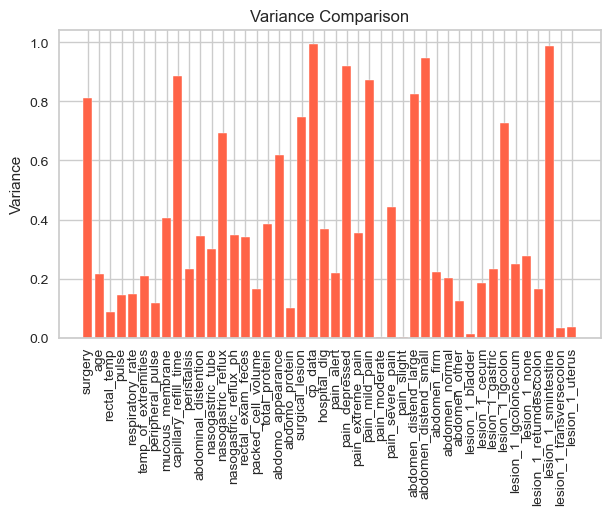

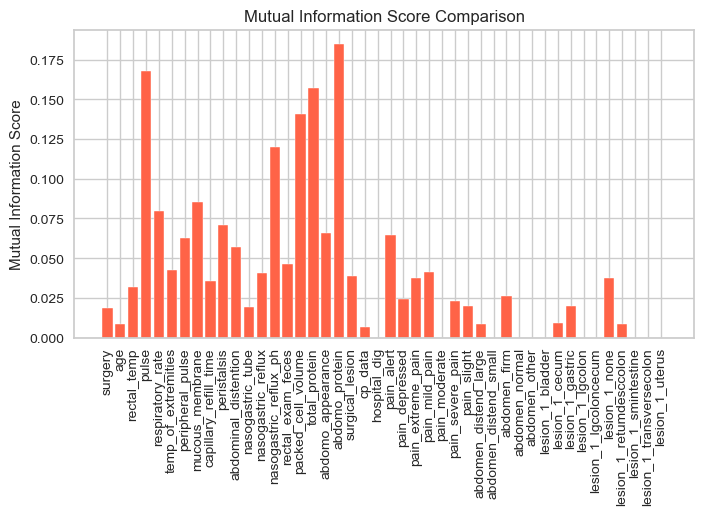

In [60]:
%run feature_selection.ipynb

In [61]:
pca = PCA(n_components=7)
PCA_df = pd.DataFrame(pca.fit_transform(df_filtered))
PCA_df

,0,1,2,3,4,5,6
0,-2.317774,1.294890,-1.504711,1.561356,-0.297943,-1.251620,-1.386201
1,3.025319,1.410207,-0.617078,-0.150165,0.837796,-1.301486,0.190986
2,-1.422345,1.154918,-1.540905,0.446977,-0.927496,-0.838341,0.979314
3,1.108571,1.731203,-0.420015,-1.387593,2.006282,-0.356201,1.660932
4,0.089420,-2.822757,-1.078102,-0.698093,-1.142393,-1.089237,0.469928
...,...,...,...,...,...,...,...
2054,0.061068,2.069415,-0.294224,-0.024333,-2.232139,-1.150764,-2.107031
2055,-1.569289,-0.674735,3.595632,0.126633,0.725531,1.021034,0.454828
2056,-2.338875,0.355409,-0.306563,-1.007527,-0.173237,0.467699,0.888150
2057,3.952627,-0.047487,0.913961,1.781914,-1.589430,0.815761,0.332406


Elbow Method to determine the number of clusters to be formed:


C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

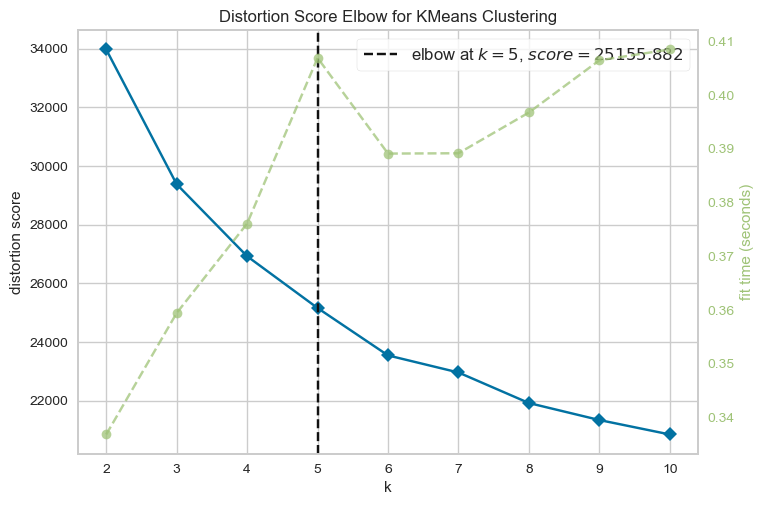

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_filtered)
Elbow_M.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.


In [64]:
cluster_df =pd.concat([pd.Series(yhat_AC,name='cluster') ,df_y],axis=1) 
cluster_df

,cluster,outcome
0,0,died
1,1,lived
2,0,died
3,1,euthanized
4,2,lived
...,...,...
2054,0,NaN
2055,3,NaN
2056,0,NaN
2057,4,NaN


In [65]:
cluster_df.groupby('cluster')['outcome'].value_counts(normalize=True)

cluster  outcome   
0        died          0.458418
         lived         0.292089
         euthanized    0.249493
1        lived         0.563452
         euthanized    0.314721
         died          0.121827
2        lived         0.687500
         died          0.210526
         euthanized    0.101974
3        died          0.690909
         lived         0.181818
         euthanized    0.127273
4        lived         0.687023
         euthanized    0.160305
         died          0.152672
Name: proportion, dtype: float64

In [67]:
from sklearn.preprocessing import OneHotEncoder

df_filtered[['c1','c2','c3','c4','c5']] = OneHotEncoder(sparse_output=False).fit_transform(cluster_df[['cluster']])
df_filtered

C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_16316\4063944010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['c1','c2','c3','c4','c5']] = OneHotEncoder(sparse_output=False).fit_transform(cluster_df[['cluster']])
C:\Users\Fabrizio Ortega\AppData\Local\Temp\ipykernel_16316\4063944010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['c1','c2','c3','c4','c5']] = OneHotEncoder(sparse_output=False).fit_transform(cluster_df[['cluster']])
C:\Users\Fabrizio Ortega\AppData\L

,0,13,21,35,40,72,75,93,114,122,...,326,327,339,340,349,c1,c2,c3,c4,c5
0,1.0,-1.0,-1.0,-0.908772,-1.0,0.111111,0.111111,-0.415584,0.2,0.2,...,1.0,1.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-1.0,-1.0,-1.0,0.918129,-1.0,-0.185185,-0.185185,0.688312,0.2,0.2,...,-1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,-1.0,-1.0,-0.929825,-1.0,-0.333333,0.333333,0.298701,0.6,-0.6,...,1.0,1.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,-1.0,-1.0,0.836257,-1.0,0.296296,0.296296,-0.285714,0.6,0.6,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,-1.0,-1.0,-0.906433,-1.0,-0.185185,-0.185185,0.506494,-0.2,0.2,...,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-1.0,-1.0,-1.0,0.892398,1.0,-0.814815,-0.814815,0.090909,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2055,1.0,-1.0,-1.0,0.461988,-1.0,0.333333,0.333333,0.090909,-0.2,-0.2,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2056,1.0,-1.0,-1.0,-0.904094,-1.0,-0.407407,-0.407407,-0.324675,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2057,-1.0,1.0,-1.0,0.880702,1.0,-0.074074,-0.074074,0.688312,-1.0,1.0,...,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
